In [1]:
import keras
import numpy as np
import struct
from keras.models import  Sequential,Model
from keras.layers import Dense,Activation
from keras.utils import np_utils
from keras.models import load_model
from keras.optimizers import RMSprop
image_path = '/home/lijq/IdeaProjects/tr/imagedata/'
image_train_data ='train-images.idx3-ubyte'
image_train_label = 'train-labels.idx1-ubyte'
image_test_data = 't10k-images.idx3-ubyte'
image_test_label = 't10k-labels.idx1-ubyte'
image_list =[image_train_data,image_train_label,image_test_data,image_test_label]
image_data_list =[]
for i in range(len(image_list)):
    print image_path+image_list[i]
    image_data_list.append(open('%s%s'%(image_path,image_list[i]),'rb').read())
def getimagedata(buffer):
    index = 0
    magic, nums,nums_rows,nums_cloumns = struct.unpack_from('>IIII',buffer,index)
    index +=struct.calcsize('>IIII')
    image_tra = []
    for im in range(0,nums):
        ims = struct.unpack_from('784B',buffer,index)
        index +=struct.calcsize('784B')
        ims = np.array(ims)
        image_tra.append(ims)
    image_tra = np.array(image_tra)
    return image_tra
def getlabeldata(buffer):
    index = 0
    label_list = []
    magic, label_num = struct.unpack_from('>II', buffer, index)
    index += struct.calcsize('>II')
    for i in range(label_num):
        label_item = int(struct.unpack_from('>B', buffer, index)[0])
        label_list.append(label_item)
        index += struct.calcsize('>B')
    label_list = np.array(label_list)
    return label_list
train_image_data = getimagedata(image_data_list[0])
train_image_label = getlabeldata(image_data_list[1])
test_image_data = getimagedata(image_data_list[2])
test_image_label = getlabeldata(image_data_list[3])
print len(train_image_data),len(train_image_label),len(test_image_data),len(test_image_label)

Using TensorFlow backend.


/home/lijq/IdeaProjects/tr/imagedata/train-images.idx3-ubyte
/home/lijq/IdeaProjects/tr/imagedata/train-labels.idx1-ubyte
/home/lijq/IdeaProjects/tr/imagedata/t10k-images.idx3-ubyte
/home/lijq/IdeaProjects/tr/imagedata/t10k-labels.idx1-ubyte
60000 60000 10000 10000


In [2]:
train_image_data= train_image_data.reshape(train_image_data.shape[0], -1) / 255.   # normalize
test_image_data = test_image_data.reshape(test_image_data.shape[0], -1) / 255.   # normalize
train_image_label = np_utils.to_categorical(train_image_label,num_classes=10)
test_image_label = np_utils.to_categorical(test_image_label,num_classes=10)

In [ ]:
model = Sequential()
model.add(Dense(32,input_dim = 784,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')

In [5]:
model.fit(train_image_data,train_image_label,epochs=2,batch_size=32)

Epoch 1/2
60000/60000 [==============================] - 19s - loss: 1.0367 - acc: 0.6722    
Epoch 2/2
60000/60000 [==============================] - 18s - loss: 0.3811 - acc: 0.8888    


In [6]:
loss,accuracy = model.evaluate(test_image_data,test_image_label)
print " model  loss:",loss,"acc:",accuracy

 9920/10000 [============================>.] - ETA: 0s model  loss: 0.31407926783 acc: 0.9078


In [9]:
model.save('./minist_mode1.h5')

In [10]:
model_reload = load_model('./minist_mode1.h5')

loss,accuracy = model_reload.evaluate(test_image_data,test_image_label)

print " reloadmodel  loss:",loss,"acc:",accuracy

 9920/10000 [============================>.] - ETA: 0s reloadmodel  loss: 0.31407926783 acc: 0.9078


800 0


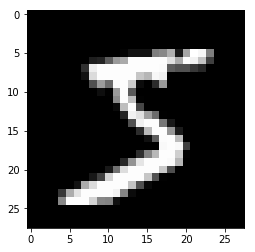

1584 1


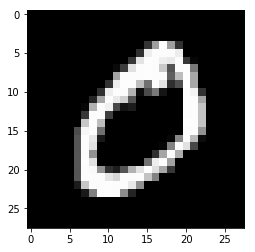

2368 2


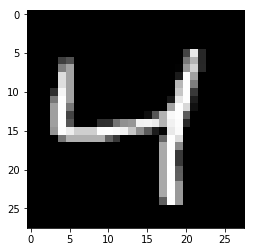

3152 3


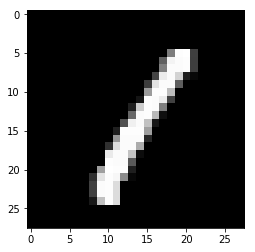

3936 4


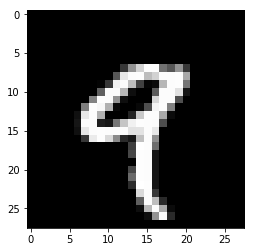

In [12]:
import struct
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Im
train_file = '/home/lijq/IdeaProjects/tr/imagedata/train-images.idx3-ubyte'
train_images = open(train_file,'rb')
buffers = train_images.read()
index = 0
magic, nums,nums_rows,nums_cloumns = struct.unpack_from('>IIII',buffers,index)
index +=struct.calcsize('>IIII')
for im in range(0,5):
    ims = struct.unpack_from('>784B',buffers,index)
    index +=struct.calcsize('>784B')
    print index,im
    ims = np.array(ims,dtype='uint8')
    ims = ims.reshape(28,28)
    plt.imshow(ims,cmap = 'gray')
    plt.show()
    imag = Im.fromarray(ims.astype(np.uint8))
    imag.save('./my_image.png','png')